**Stock market price prediction for 11 Feb 10 am morning**

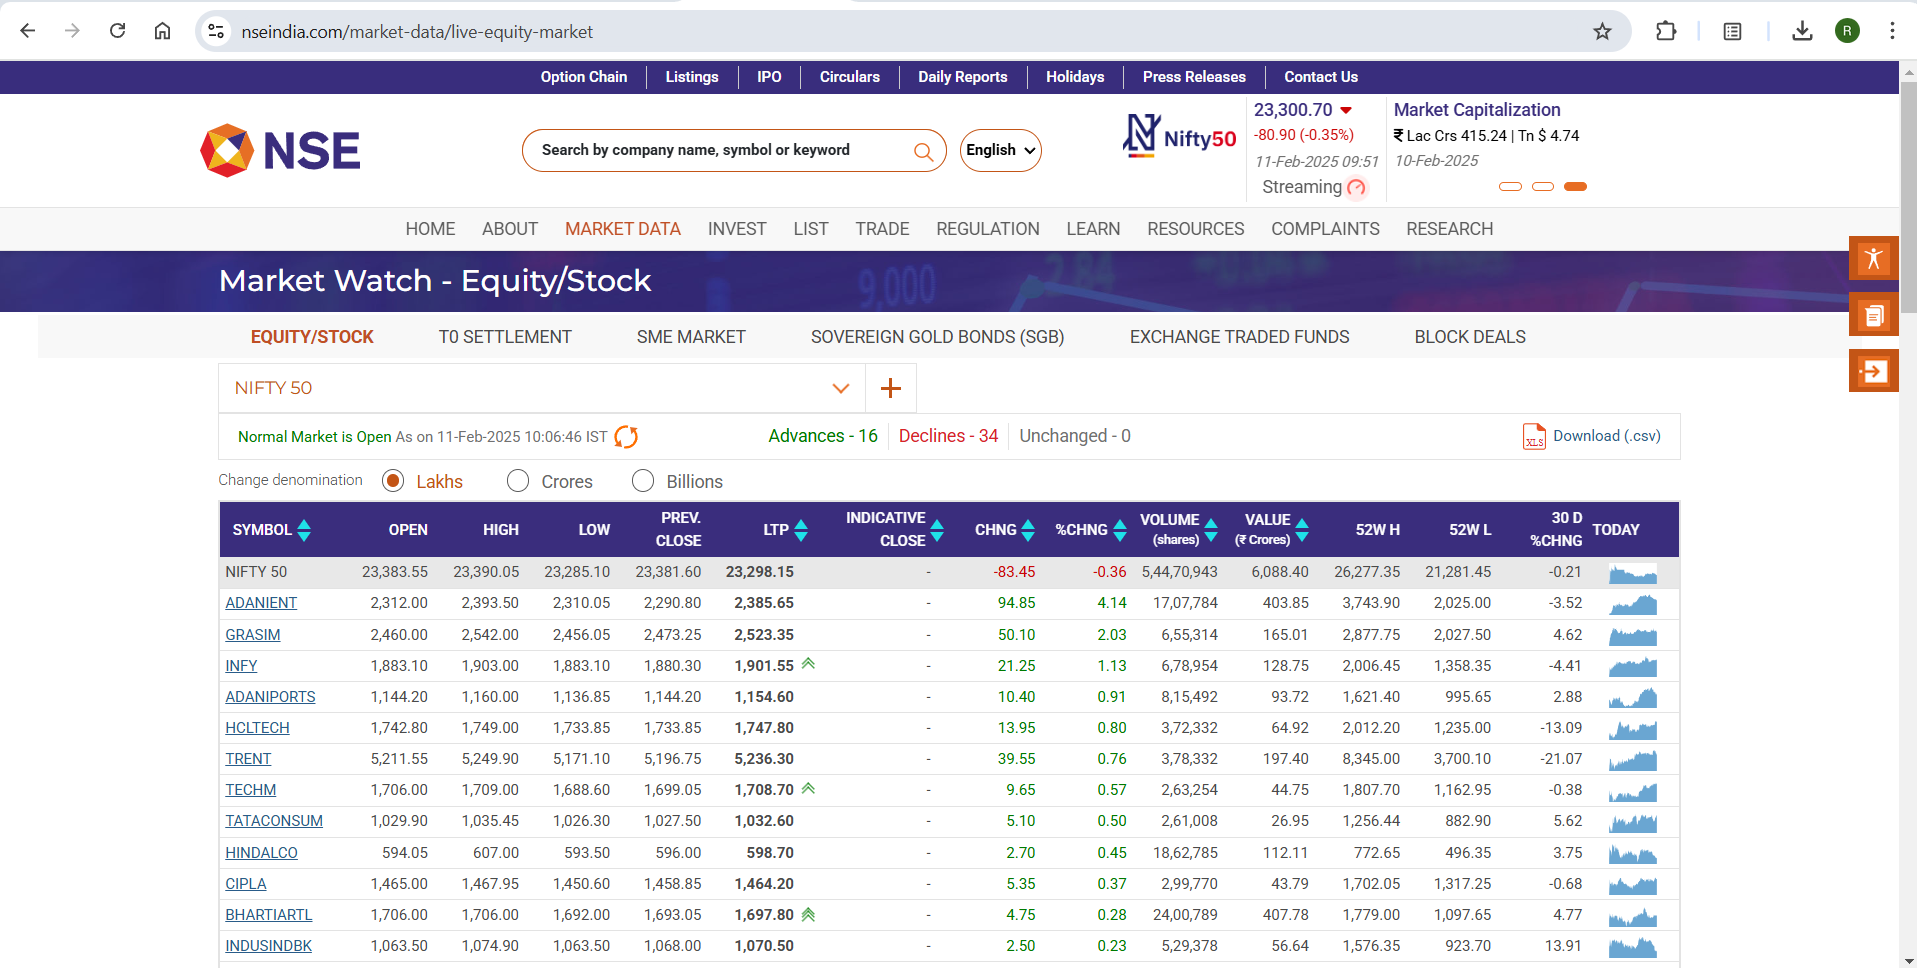

**Columns Description**

SYMBOL – The stock symbol or ticker name of the security.

OPEN – The opening price of the stock for the day.
    
HIGH – The highest price of the stock reached during the trading session.
    
LOW – The lowest price of the stock reached during the trading session.
    
PREV. CLOSE – The stock's closing price from the previous trading session.

LTP (Last Traded Price) – The last recorded price at which the stock was traded.

INDICATIVE CLOSE – Indicative closing price (value is missing for all records).
                                             
CHNG – The absolute change in price from the previous close.

%CHNG – The percentage change in price from the previous close.
    
VOLUME (shares) – The total number of shares traded during the session.

VALUE (₹ Lakhs) – The total traded value in lakhs of Indian Rupees.
    
52W H (52-Week High) – The highest price the stock has reached in the past 52 weeks.

52W L (52-Week Low) – The lowest price the stock has reached in the past 52 weeks.

30 D %CHNG – The percentage change in stock price over the last 30 days.

365 D % CHNG (as of 09-Feb-2024) – The percentage change in stock price over the last year.


**Importing Important Libraries**

In [6]:
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import numpy as np

**Reading Dataset**

In [8]:
z = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\MW-NIFTY-50-11-Feb-2025.csv")
z

,SYMBOL \n,OPEN \n,HIGH \n,LOW \n,PREV. CLOSE \n,LTP \n,INDICATIVE CLOSE \n,CHNG \n,%CHNG \n,VOLUME \n(shares),VALUE \n (₹ Lakhs),52W H \n,52W L \n,30 D %CHNG \n,365 D % CHNG \n 09-Feb-2024
0,NIFTY 50,"23,383.55","23,390.05","23,285.10","23,381.60","23,298.15",-,-83.45,-0.36,"5,47,19,074","6,11,251.32","26,277.35","21,281.45",-0.21,7.34
1,ADANIENT,"2,312.00","2,393.50","2,310.05","2,290.80","2,389.00",-,98.20,4.29,"17,19,758","40,670.73","3,743.90","2,025.00",-3.52,-28.75
2,GRASIM,"2,460.00","2,542.00","2,456.05","2,473.25","2,525.00",-,51.75,2.09,"6,56,522","16,531.55","2,877.75","2,027.50",4.62,14.05
3,INFY,"1,883.10","1,903.00","1,883.10","1,880.30","1,902.00",-,21.70,1.15,"6,84,002","12,970.80","2,006.45","1,358.35",-4.41,12.64
4,ADANIPORTS,"1,144.20","1,160.00","1,136.85","1,144.20","1,155.70",-,11.50,1.01,"8,16,676","9,385.81","1,621.40",995.65,2.88,-10.01
5,TRENT,"5,211.55","5,249.90","5,171.10","5,196.75","5,240.00",-,43.25,0.83,"3,79,116","19,781.06","8,345.00","3,700.10",-21.07,38.23
6,HCLTECH,"1,742.80","1,749.00","1,733.85","1,733.85","1,747.90",-,14.05,0.81,"3,74,007","6,521.07","2,012.20","1,235.00",-13.09,6.33
7,TECHM,"1,706.00","1,709.00","1,688.60","1,699.05","1,708.90",-,9.85,0.58,"2,65,299","4,510.30","1,807.70","1,162.95",-0.38,29.59
8,HINDALCO,594.05,607.00,593.50,596.00,599.35,-,3.35,0.56,"18,70,022","11,254.54",772.65,496.35,3.75,0.79
9,TATACONSUM,"1,029.90","1,035.45","1,026.30","1,027.50","1,032.25",-,4.75,0.46,"2,62,147","2,706.80","1,256.44",882.90,5.62,-9.01


**To know total number of null values of respective columns**

In [10]:
z.isnull().sum()

SYMBOL \n                      0
OPEN \n                        0
HIGH \n                        0
LOW \n                         0
PREV. CLOSE \n                 0
LTP \n                         0
INDICATIVE CLOSE \n            0
CHNG \n                        0
%CHNG \n                       0
VOLUME \n(shares)              0
VALUE \n (₹ Lakhs)             0
52W H \n                       0
52W L \n                       0
30 D   %CHNG \n                0
365 D % CHNG \n 09-Feb-2024    0
dtype: int64

**To know names of respective columns**

In [12]:
z.columns

Index(['SYMBOL \n', 'OPEN \n', 'HIGH \n', 'LOW \n', 'PREV. CLOSE \n', 'LTP \n',
       'INDICATIVE CLOSE \n', 'CHNG \n', '%CHNG \n', 'VOLUME \n(shares)',
       'VALUE \n (₹ Lakhs)', '52W H \n', '52W L \n', '30 D   %CHNG \n',
       '365 D % CHNG \n 09-Feb-2024'],
      dtype='object')

**Rename respective columns**

In [14]:
z.columns = z.columns.str.strip()

In [15]:
z

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,INDICATIVE CLOSE,CHNG,%CHNG,VOLUME \n(shares),VALUE \n (₹ Lakhs),52W H,52W L,30 D %CHNG,365 D % CHNG \n 09-Feb-2024
0,NIFTY 50,"23,383.55","23,390.05","23,285.10","23,381.60","23,298.15",-,-83.45,-0.36,"5,47,19,074","6,11,251.32","26,277.35","21,281.45",-0.21,7.34
1,ADANIENT,"2,312.00","2,393.50","2,310.05","2,290.80","2,389.00",-,98.20,4.29,"17,19,758","40,670.73","3,743.90","2,025.00",-3.52,-28.75
2,GRASIM,"2,460.00","2,542.00","2,456.05","2,473.25","2,525.00",-,51.75,2.09,"6,56,522","16,531.55","2,877.75","2,027.50",4.62,14.05
3,INFY,"1,883.10","1,903.00","1,883.10","1,880.30","1,902.00",-,21.70,1.15,"6,84,002","12,970.80","2,006.45","1,358.35",-4.41,12.64
4,ADANIPORTS,"1,144.20","1,160.00","1,136.85","1,144.20","1,155.70",-,11.50,1.01,"8,16,676","9,385.81","1,621.40",995.65,2.88,-10.01
5,TRENT,"5,211.55","5,249.90","5,171.10","5,196.75","5,240.00",-,43.25,0.83,"3,79,116","19,781.06","8,345.00","3,700.10",-21.07,38.23
6,HCLTECH,"1,742.80","1,749.00","1,733.85","1,733.85","1,747.90",-,14.05,0.81,"3,74,007","6,521.07","2,012.20","1,235.00",-13.09,6.33
7,TECHM,"1,706.00","1,709.00","1,688.60","1,699.05","1,708.90",-,9.85,0.58,"2,65,299","4,510.30","1,807.70","1,162.95",-0.38,29.59
8,HINDALCO,594.05,607.00,593.50,596.00,599.35,-,3.35,0.56,"18,70,022","11,254.54",772.65,496.35,3.75,0.79
9,TATACONSUM,"1,029.90","1,035.45","1,026.30","1,027.50","1,032.25",-,4.75,0.46,"2,62,147","2,706.80","1,256.44",882.90,5.62,-9.01


In [16]:
z["INDICATIVE CLOSE"].value_counts()

INDICATIVE CLOSE
-    51
Name: count, dtype: int64

**As `INDICATIVE CLOSE` column contains null value we can drop from our dataframe**

In [18]:
z.drop(["INDICATIVE CLOSE"], axis = 1, inplace = True)

**Replacing "," with empty columns to change thier dataype from string to float datype**

In [20]:
for i in z:
    if(z[i].dtype == "object") and ( i != "SYMBOL"):
        z[i] = z[i].apply(lambda x : x.replace(",", "").replace(",", ""))
    

**To know shape of Dataframe**

In [22]:
z.shape

(51, 14)

**To size of Dataframe**

In [24]:
z.size

714

**To get infomation of nonull valus and datatypes of respective columns from dataframe**

In [26]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SYMBOL                      51 non-null     object 
 1   OPEN                        51 non-null     object 
 2   HIGH                        51 non-null     object 
 3   LOW                         51 non-null     object 
 4   PREV. CLOSE                 51 non-null     object 
 5   LTP                         51 non-null     object 
 6   CHNG                        51 non-null     object 
 7   %CHNG                       51 non-null     object 
 8   VOLUME 
(shares)            51 non-null     object 
 9   VALUE 
 (₹ Lakhs)           51 non-null     object 
 10  52W H                       51 non-null     object 
 11  52W L                       51 non-null     object 
 12  30 D   %CHNG                51 non-null     float64
 13  365 D % CHNG 
 09-Feb-2024  51 non-nu

**To datypes of respective columns**

In [28]:
z.dtypes

SYMBOL                          object
OPEN                            object
HIGH                            object
LOW                             object
PREV. CLOSE                     object
LTP                             object
CHNG                            object
%CHNG                           object
VOLUME \n(shares)               object
VALUE \n (₹ Lakhs)              object
52W H                           object
52W L                           object
30 D   %CHNG                   float64
365 D % CHNG \n 09-Feb-2024    float64
dtype: object

In [29]:
z["OPEN"].values

array(['23383.55', '2312.00', '2460.00', '1883.10', '1144.20', '5211.55',
       '1742.80', '1706.00', '594.05', '1029.90', '1465.00', '1063.50',
       '950.05', '12899.95', '1706.00', '1009.00', '2221.05', '4018.40',
       '1264.55', '312.35', '1725.20', '2371.00', '3334.70', '428.80',
       '319.50', '8299.00', '1255.85', '2279.00', '1220.00', '11497.00',
       '3360.95', '133.00', '3146.85', '4910.95', '242.45', '737.45',
       '1703.00', '696.00', '1792.40', '4200.00', '1964.60', '8830.00',
       '259.50', '273.80', '566.00', '1448.20', '632.25', '370.00',
       '268.70', '6799.90', '5138.85'], dtype=object)

In [30]:
for i in z:
    if(z[i].dtype == "object") and ( i != "SYMBOL"):
        z = z[z[i] != "-"]
z

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE \n (₹ Lakhs),52W H,52W L,30 D %CHNG,365 D % CHNG \n 09-Feb-2024
0,NIFTY 50,23383.55,23390.05,23285.10,23381.60,23298.15,-83.45,-0.36,54719074,611251.32,26277.35,21281.45,-0.21,7.34
1,ADANIENT,2312.00,2393.50,2310.05,2290.80,2389.00,98.20,4.29,1719758,40670.73,3743.90,2025.00,-3.52,-28.75
2,GRASIM,2460.00,2542.00,2456.05,2473.25,2525.00,51.75,2.09,656522,16531.55,2877.75,2027.50,4.62,14.05
3,INFY,1883.10,1903.00,1883.10,1880.30,1902.00,21.70,1.15,684002,12970.80,2006.45,1358.35,-4.41,12.64
4,ADANIPORTS,1144.20,1160.00,1136.85,1144.20,1155.70,11.50,1.01,816676,9385.81,1621.40,995.65,2.88,-10.01
5,TRENT,5211.55,5249.90,5171.10,5196.75,5240.00,43.25,0.83,379116,19781.06,8345.00,3700.10,-21.07,38.23
6,HCLTECH,1742.80,1749.00,1733.85,1733.85,1747.90,14.05,0.81,374007,6521.07,2012.20,1235.00,-13.09,6.33
7,TECHM,1706.00,1709.00,1688.60,1699.05,1708.90,9.85,0.58,265299,4510.30,1807.70,1162.95,-0.38,29.59
8,HINDALCO,594.05,607.00,593.50,596.00,599.35,3.35,0.56,1870022,11254.54,772.65,496.35,3.75,0.79
9,TATACONSUM,1029.90,1035.45,1026.30,1027.50,1032.25,4.75,0.46,262147,2706.80,1256.44,882.90,5.62,-9.01


In [31]:
for i in z:
    if(z[i].dtype == "object") and ( i != "SYMBOL"):
        z[i] = z[i].astype(float)
z

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE \n (₹ Lakhs),52W H,52W L,30 D %CHNG,365 D % CHNG \n 09-Feb-2024
0,NIFTY 50,23383.55,23390.05,23285.10,23381.60,23298.15,-83.45,-0.36,54719074.0,611251.32,26277.35,21281.45,-0.21,7.34
1,ADANIENT,2312.00,2393.50,2310.05,2290.80,2389.00,98.20,4.29,1719758.0,40670.73,3743.90,2025.00,-3.52,-28.75
2,GRASIM,2460.00,2542.00,2456.05,2473.25,2525.00,51.75,2.09,656522.0,16531.55,2877.75,2027.50,4.62,14.05
3,INFY,1883.10,1903.00,1883.10,1880.30,1902.00,21.70,1.15,684002.0,12970.80,2006.45,1358.35,-4.41,12.64
4,ADANIPORTS,1144.20,1160.00,1136.85,1144.20,1155.70,11.50,1.01,816676.0,9385.81,1621.40,995.65,2.88,-10.01
5,TRENT,5211.55,5249.90,5171.10,5196.75,5240.00,43.25,0.83,379116.0,19781.06,8345.00,3700.10,-21.07,38.23
6,HCLTECH,1742.80,1749.00,1733.85,1733.85,1747.90,14.05,0.81,374007.0,6521.07,2012.20,1235.00,-13.09,6.33
7,TECHM,1706.00,1709.00,1688.60,1699.05,1708.90,9.85,0.58,265299.0,4510.30,1807.70,1162.95,-0.38,29.59
8,HINDALCO,594.05,607.00,593.50,596.00,599.35,3.35,0.56,1870022.0,11254.54,772.65,496.35,3.75,0.79
9,TATACONSUM,1029.90,1035.45,1026.30,1027.50,1032.25,4.75,0.46,262147.0,2706.80,1256.44,882.90,5.62,-9.01


**Bivariate Analysis**

**Ploting barplot between `Symbol` columns and  numerical columns from dataframe**

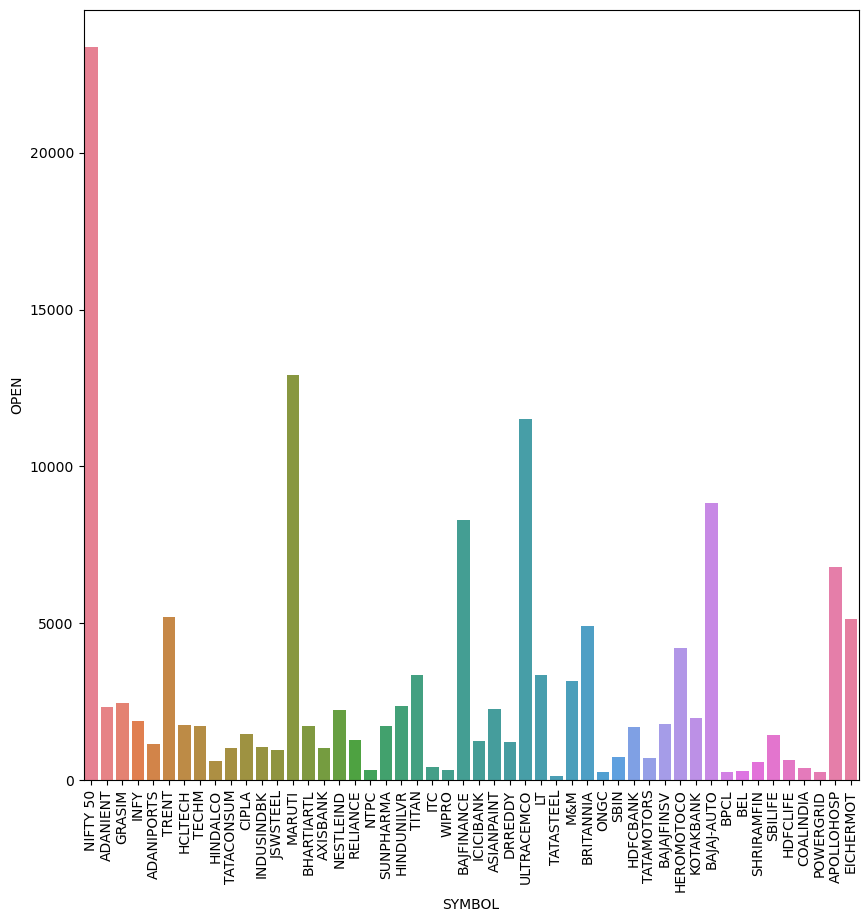

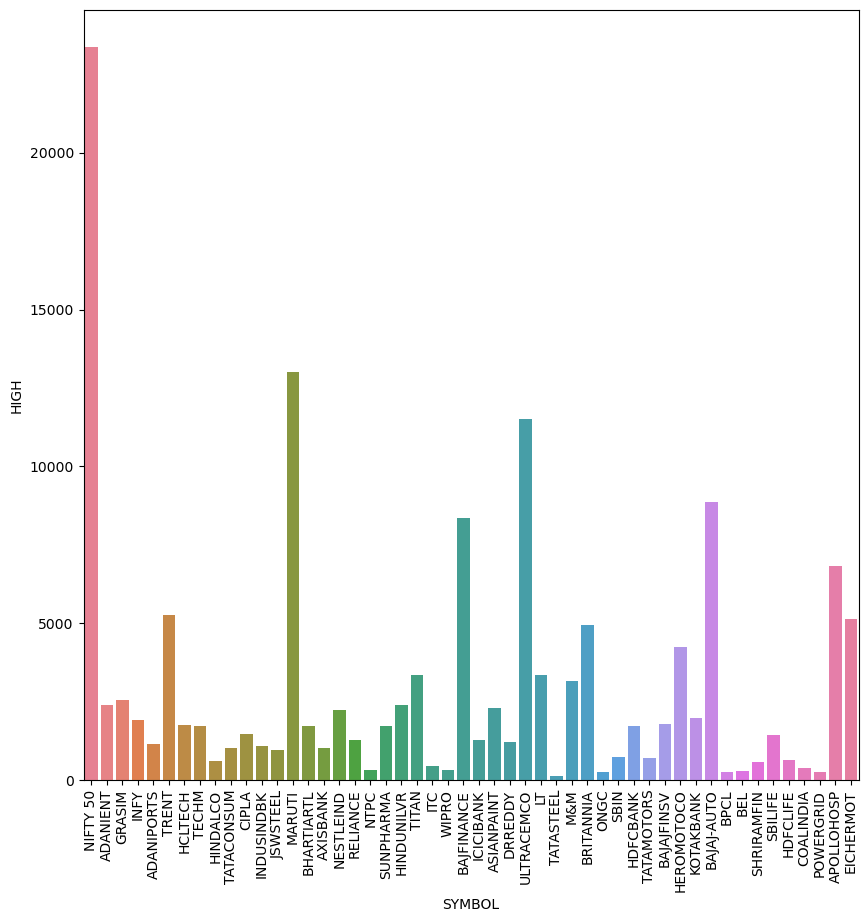

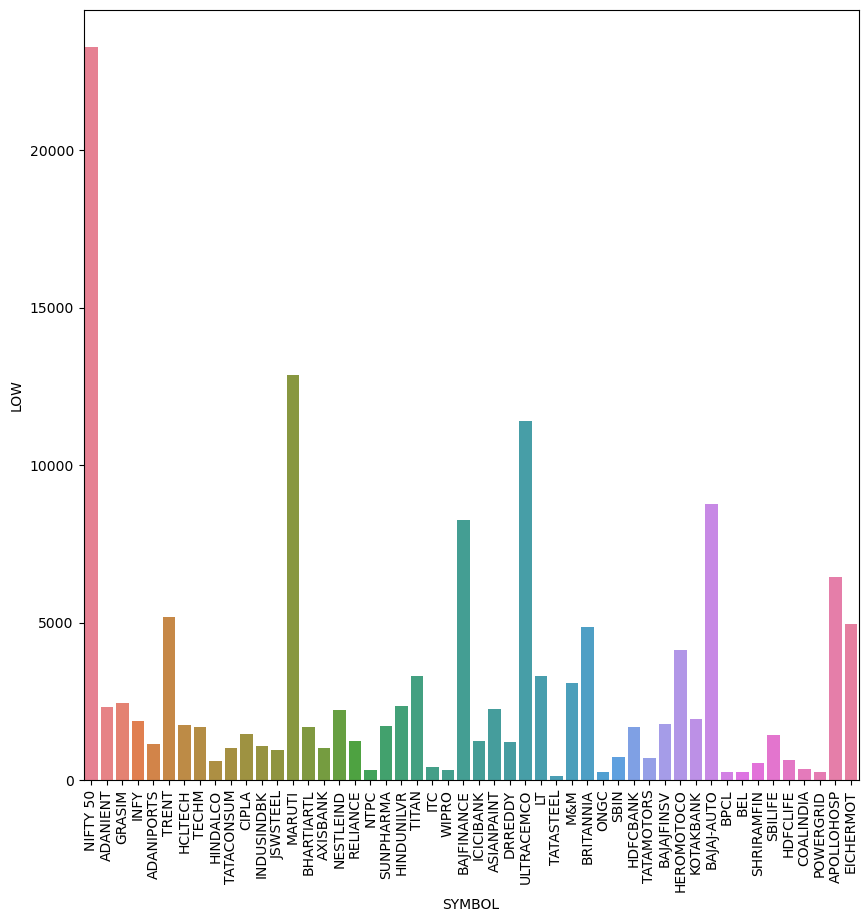

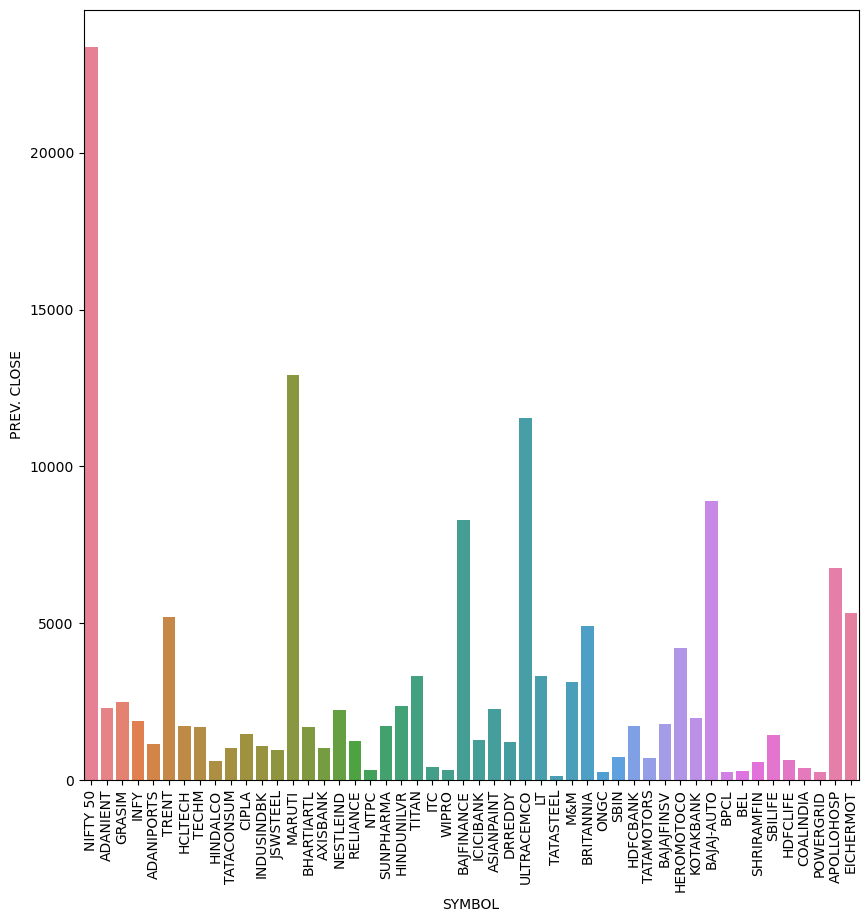

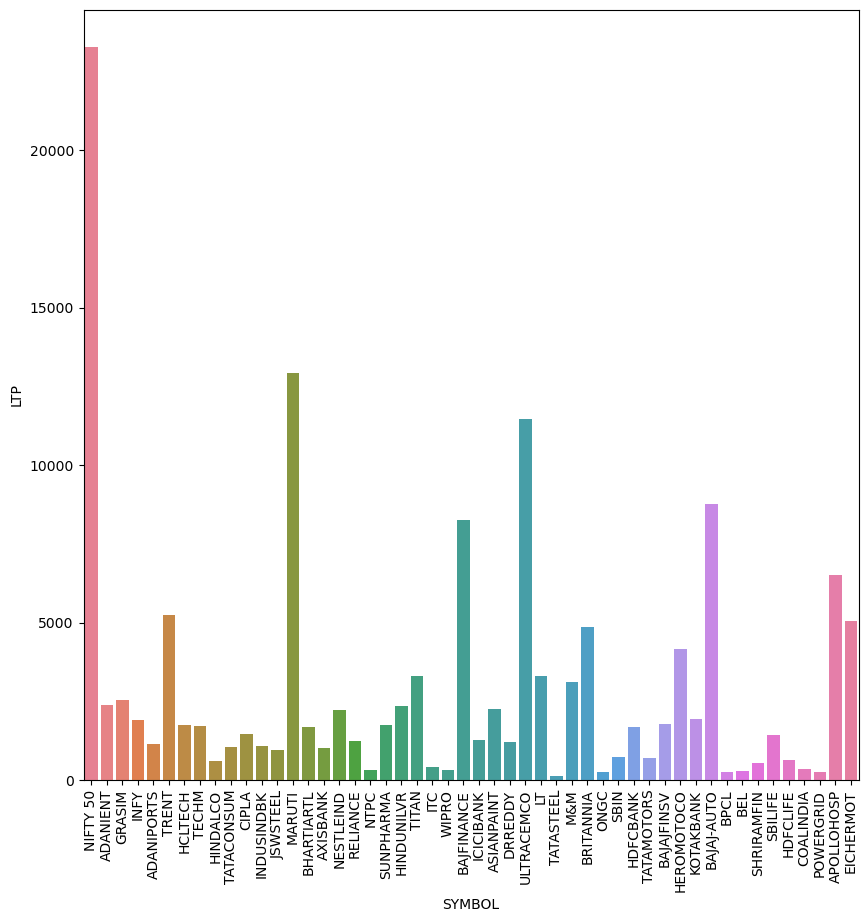

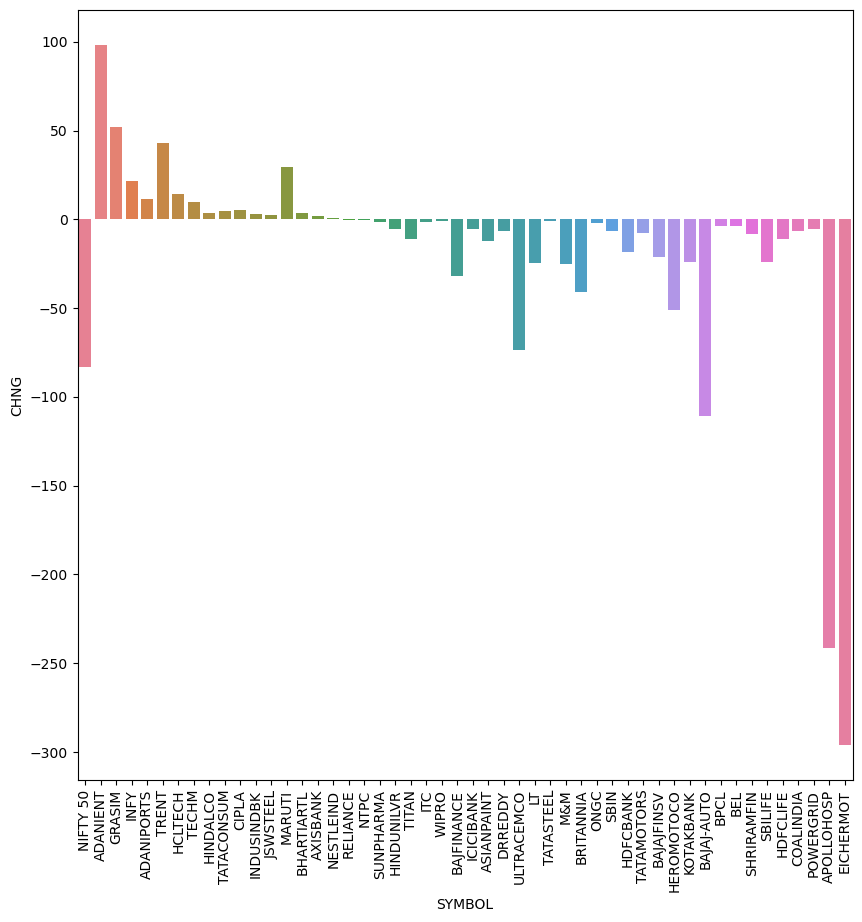

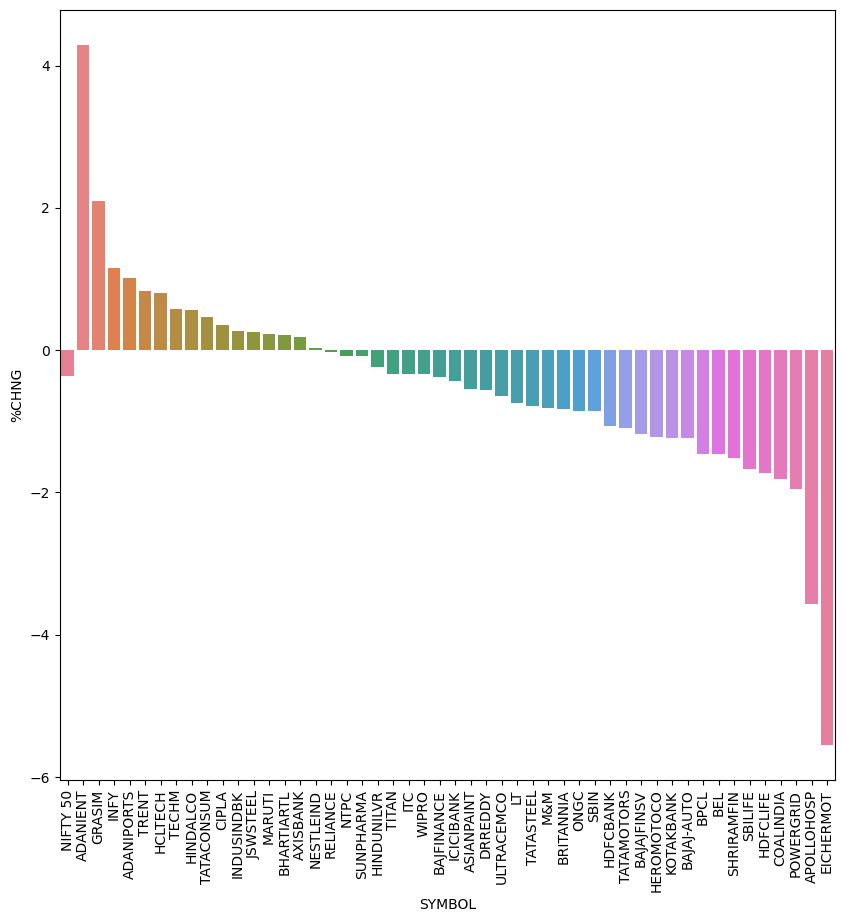

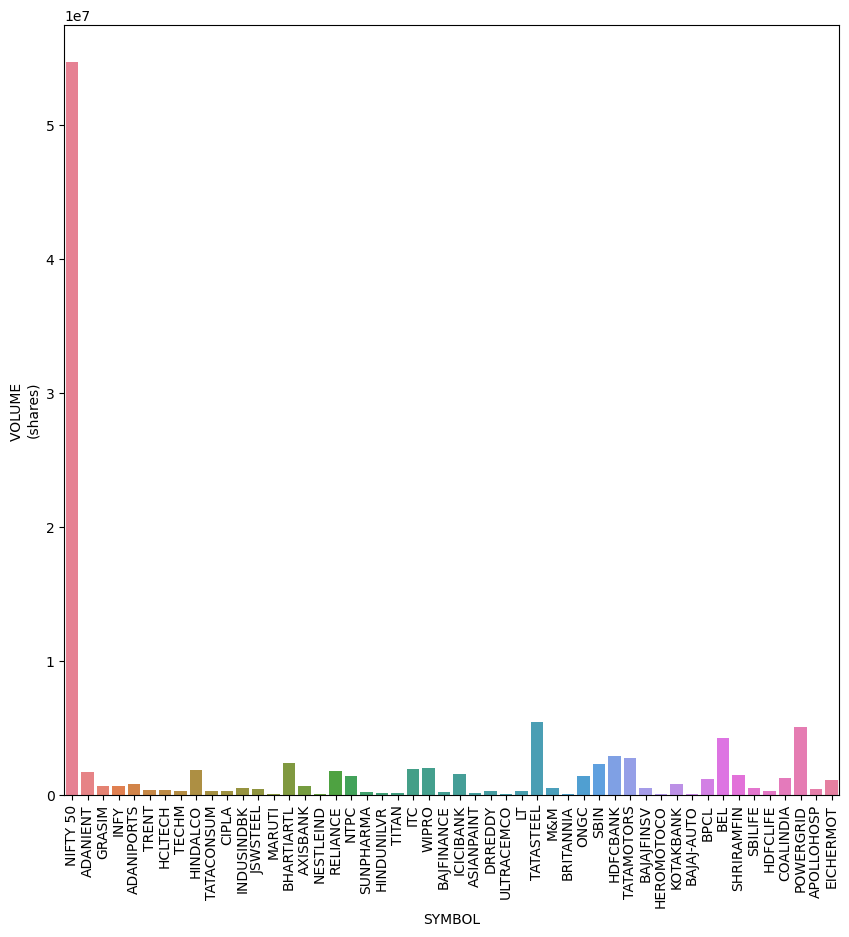

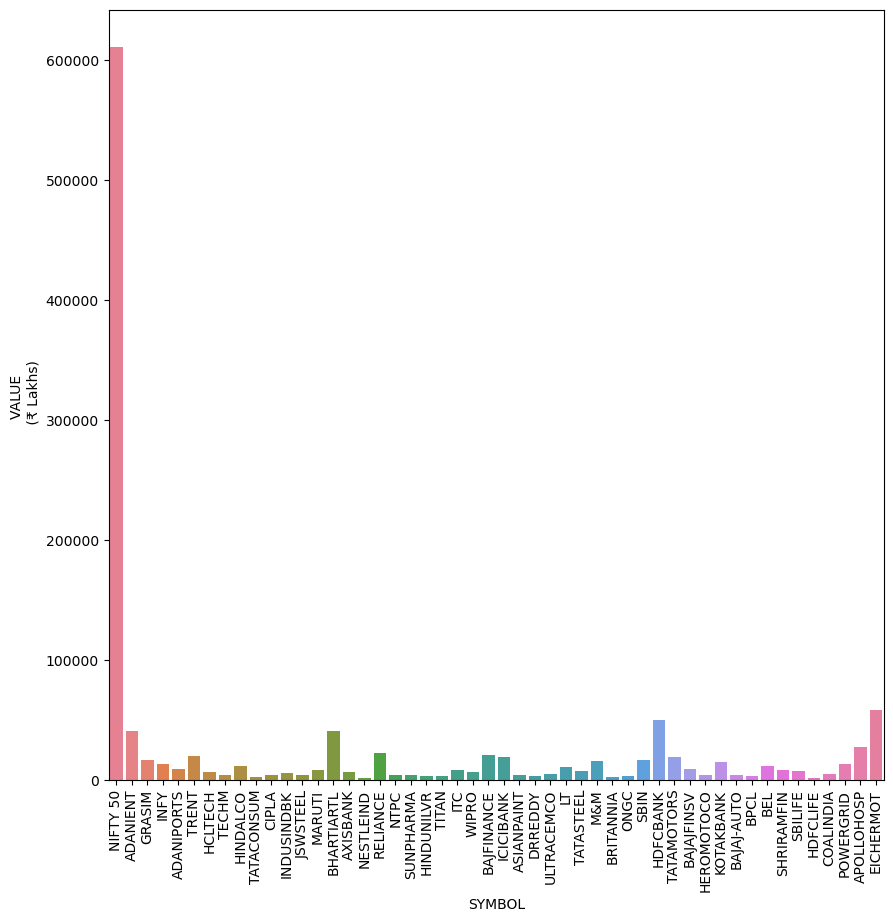

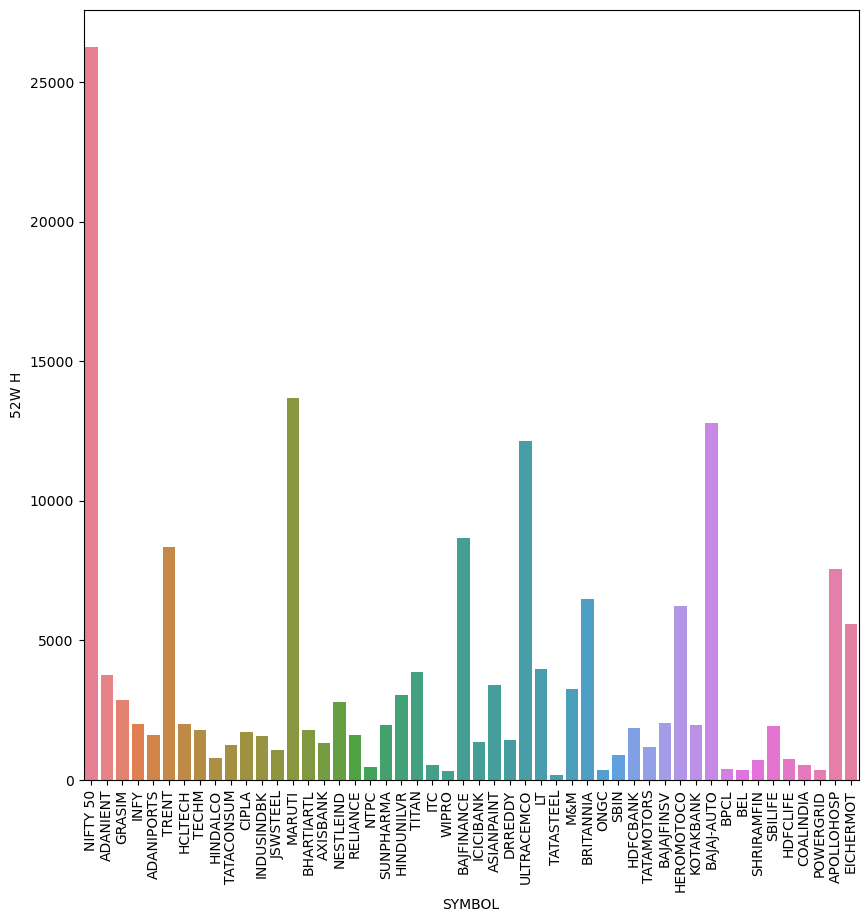

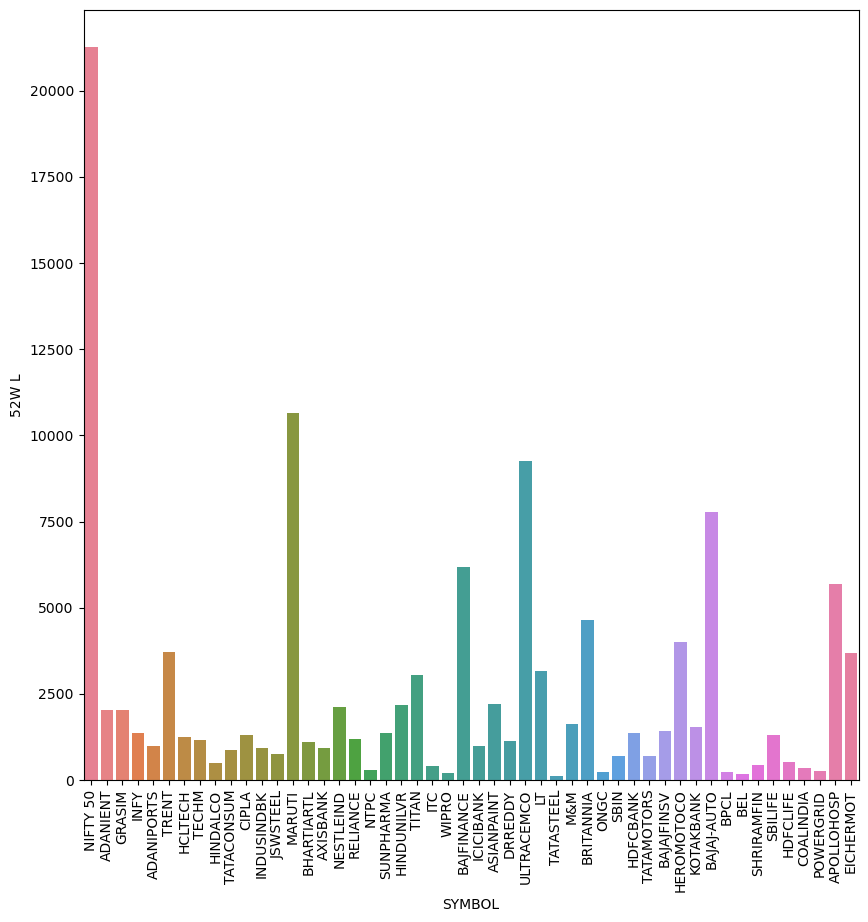

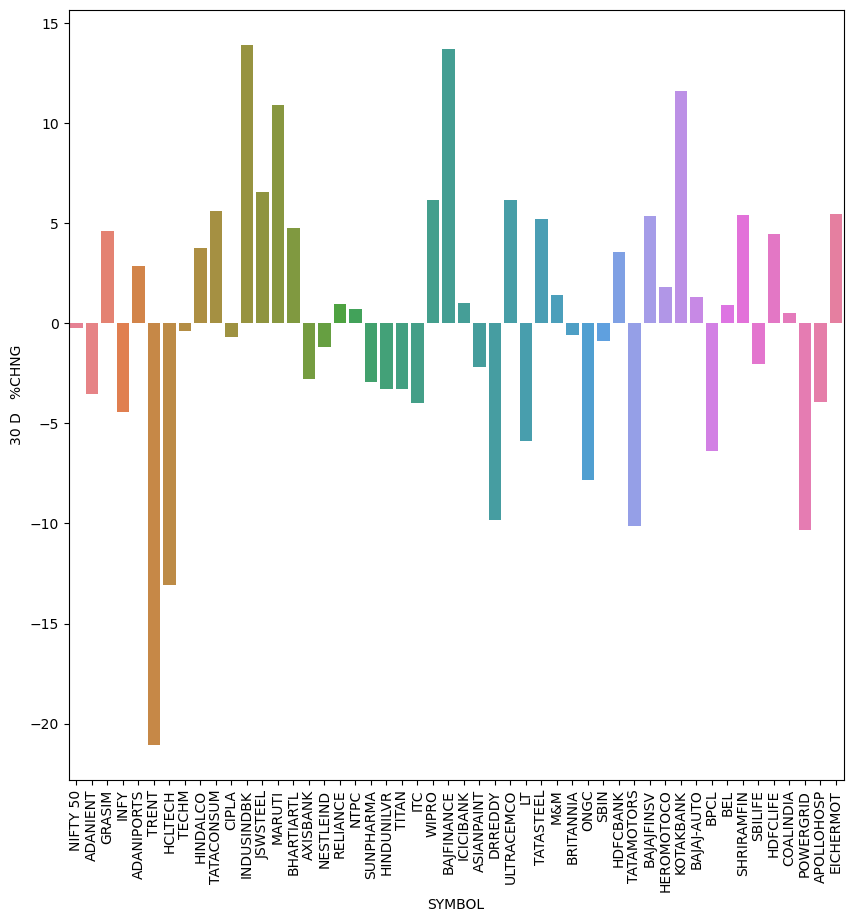

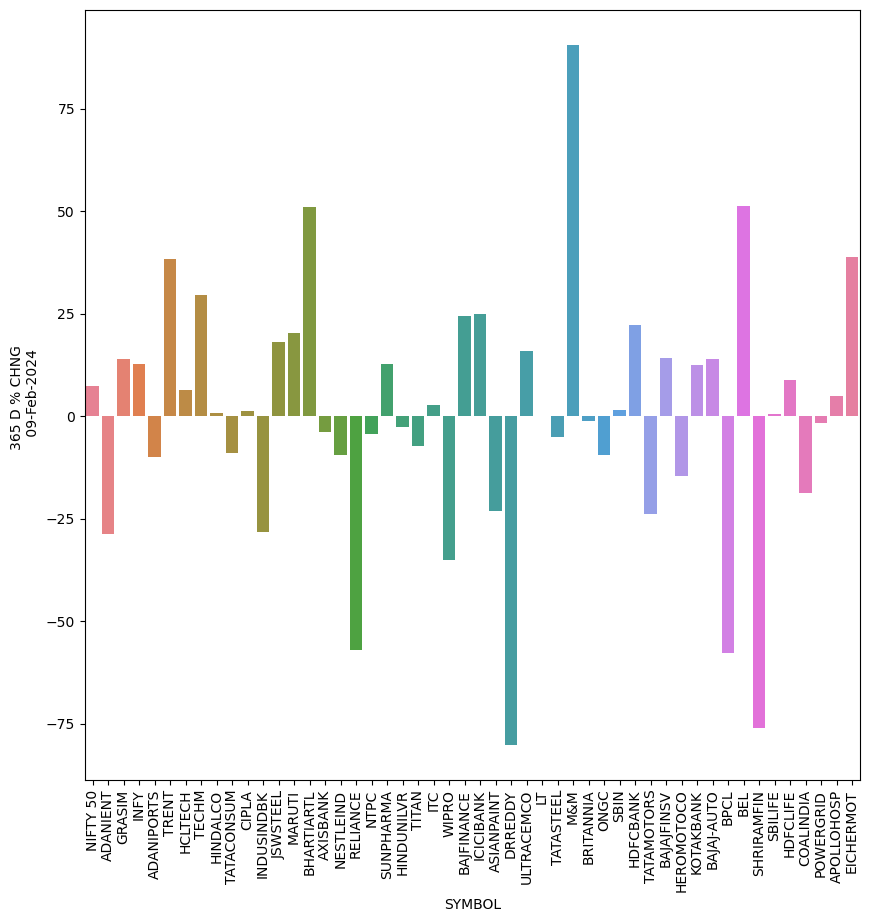

In [34]:
for i in z:
    if(z[i].dtype != "object"):
        plt.figure(figsize = (10, 10))
        sns.barplot(x = z["SYMBOL"], y = z[i], data = z, hue = z["SYMBOL"])
        plt.xticks(rotation = 90)


**Plotting scatterplot between two numerical columns from dataframe**

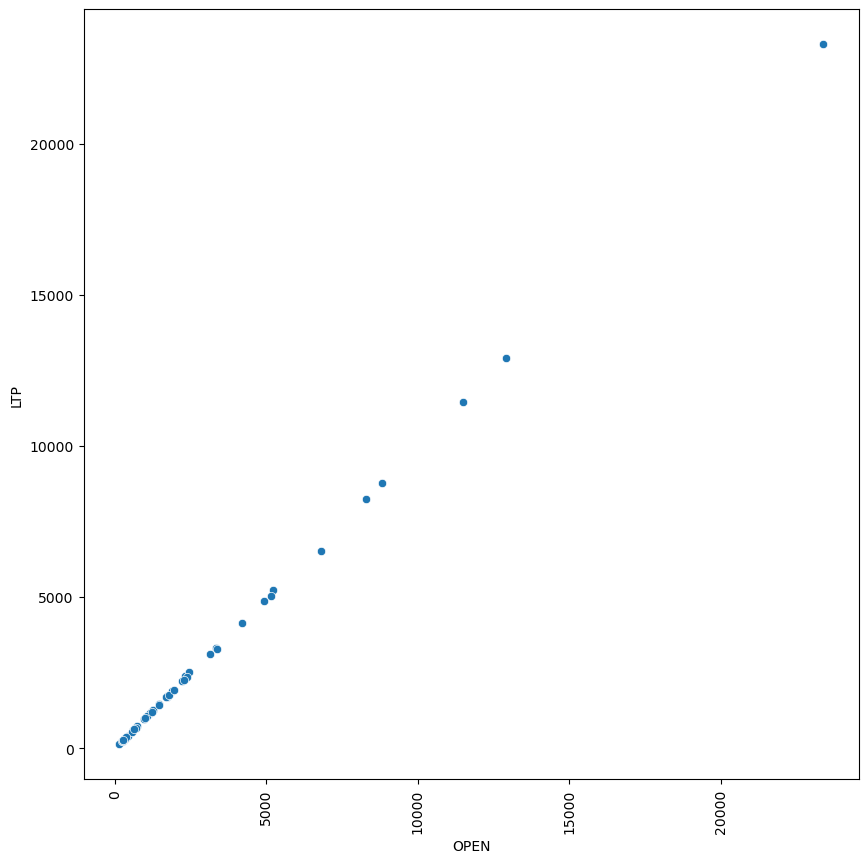

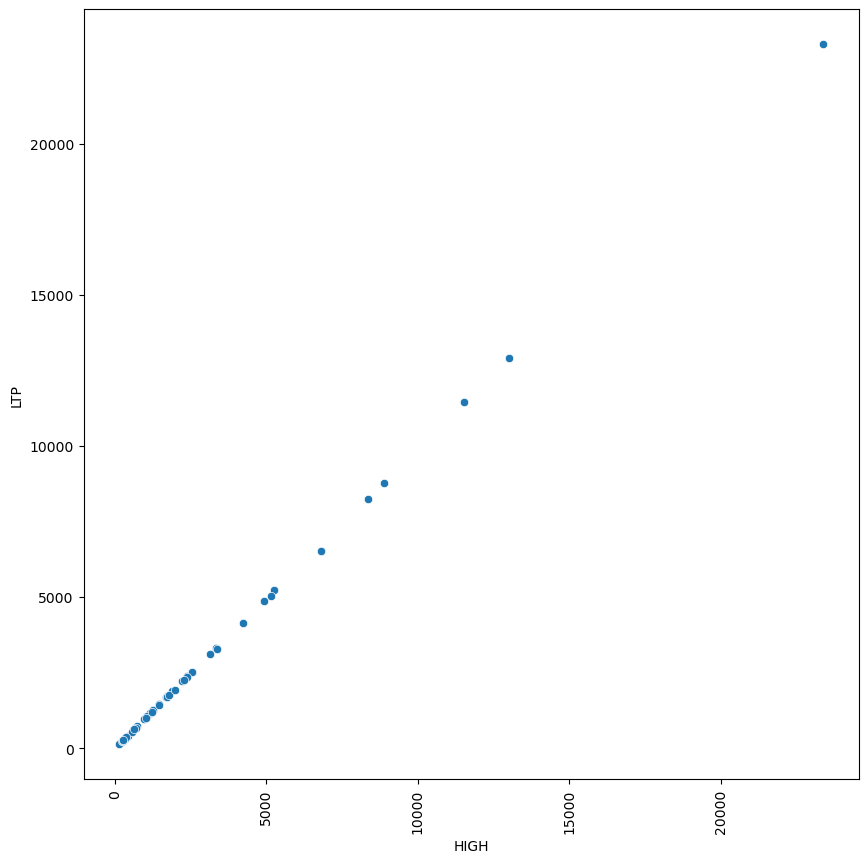

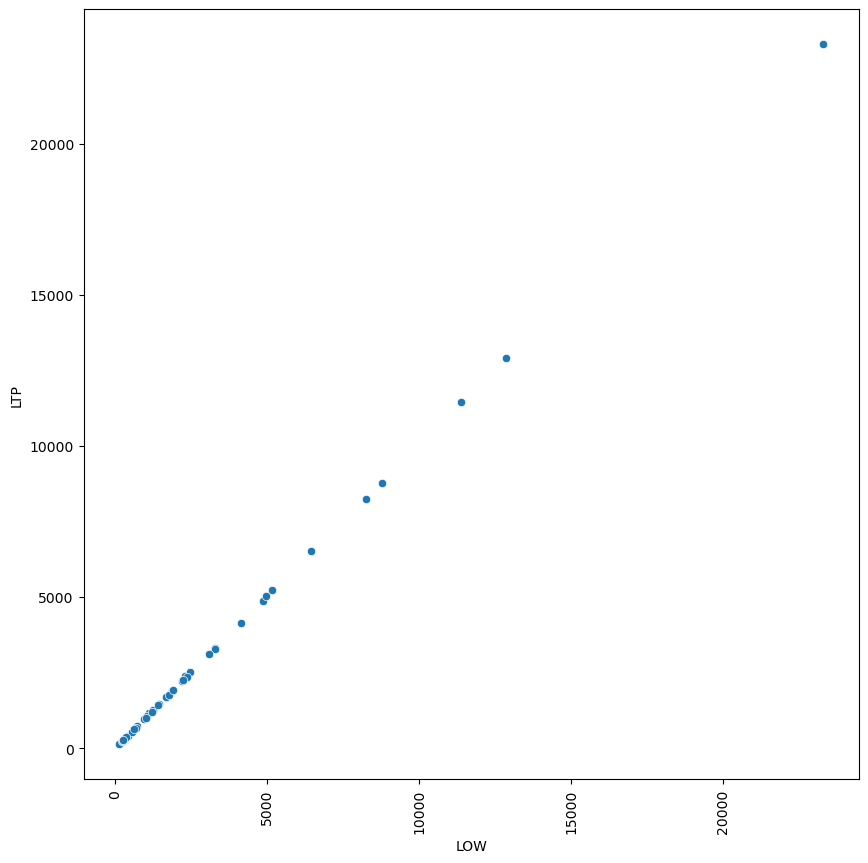

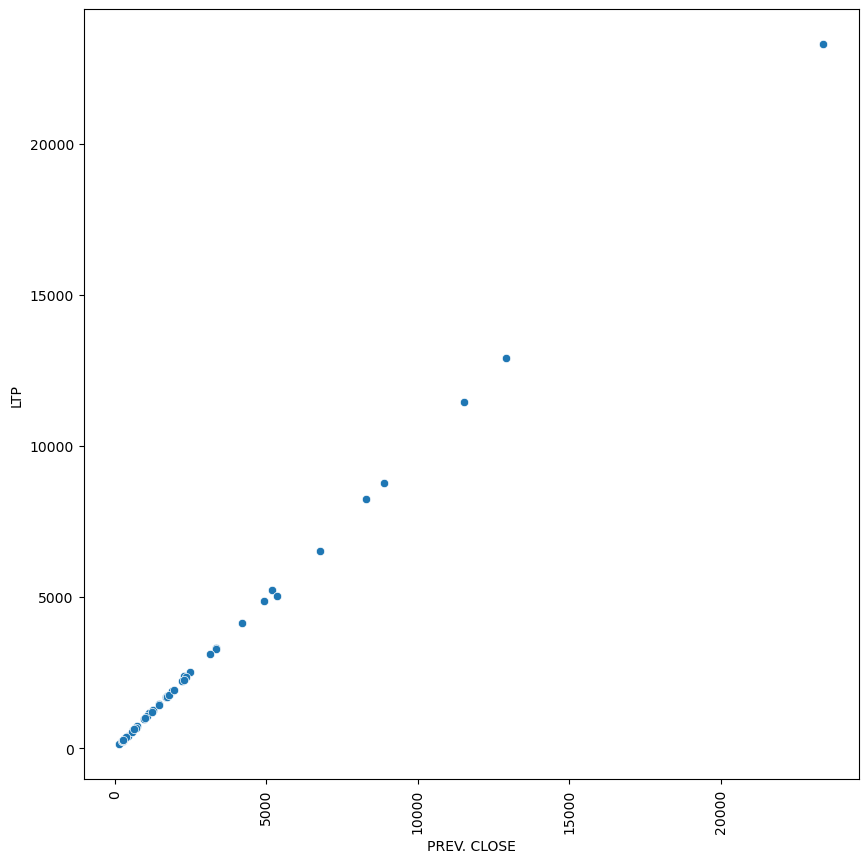

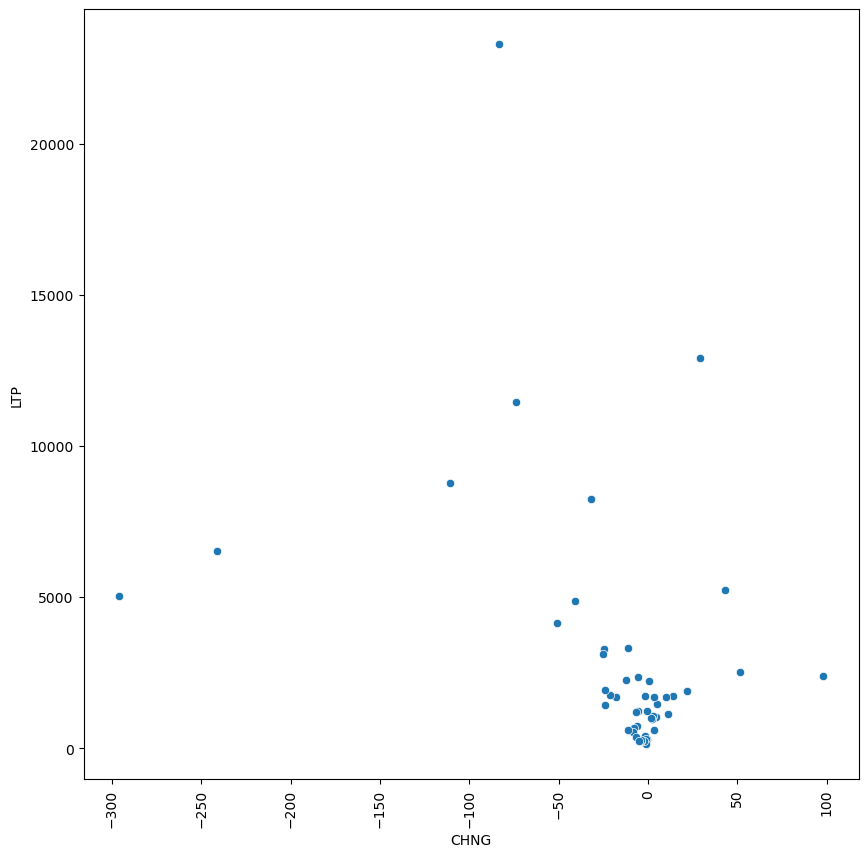

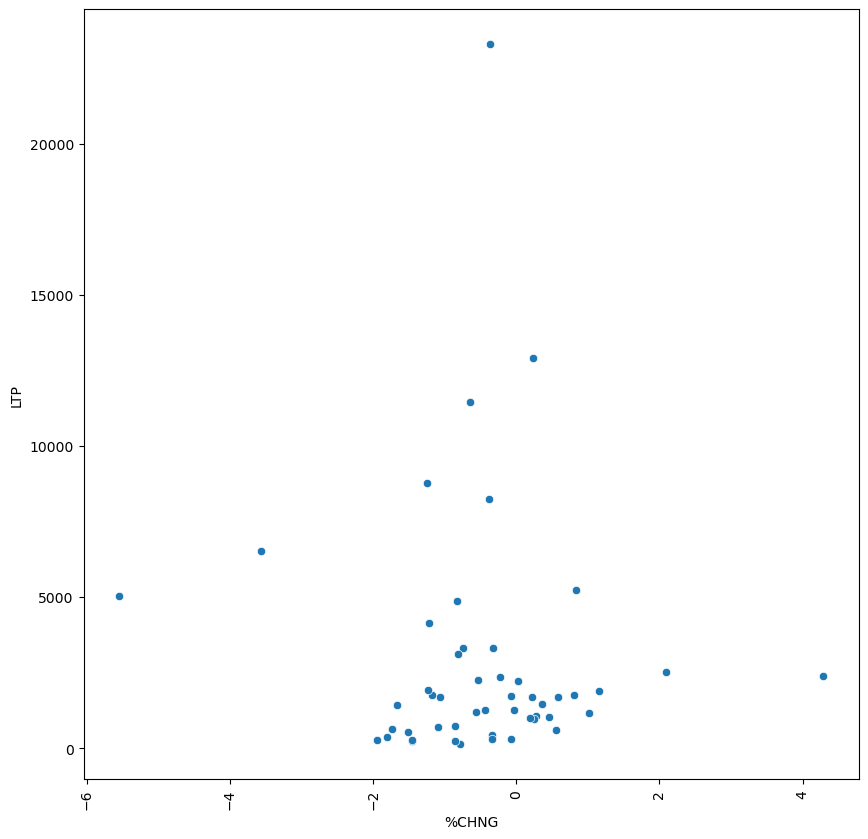

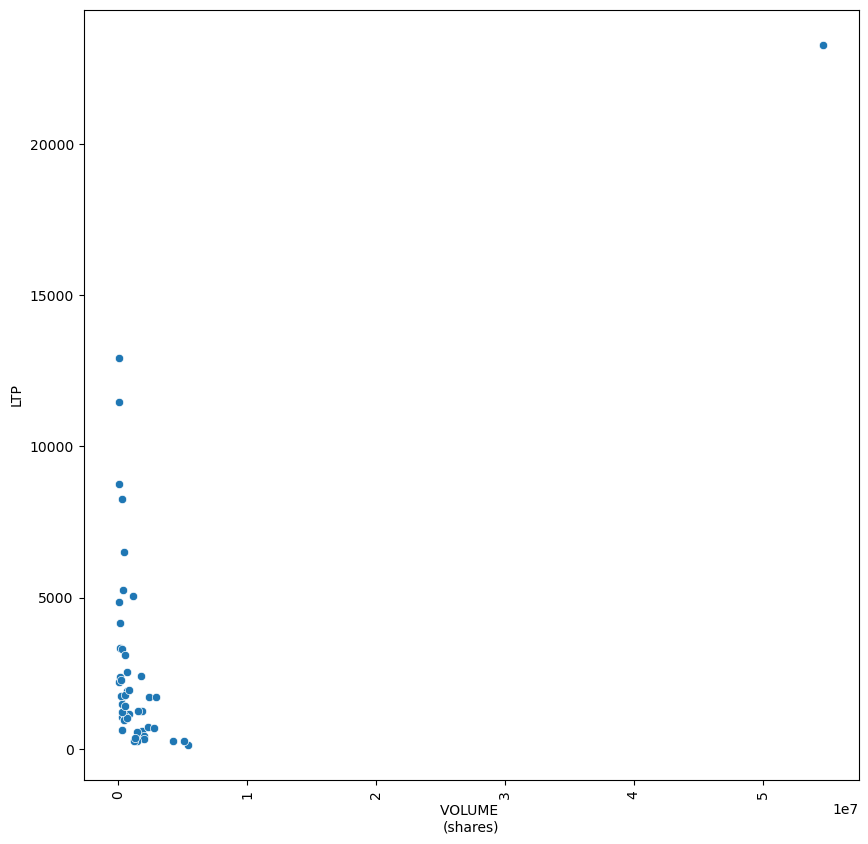

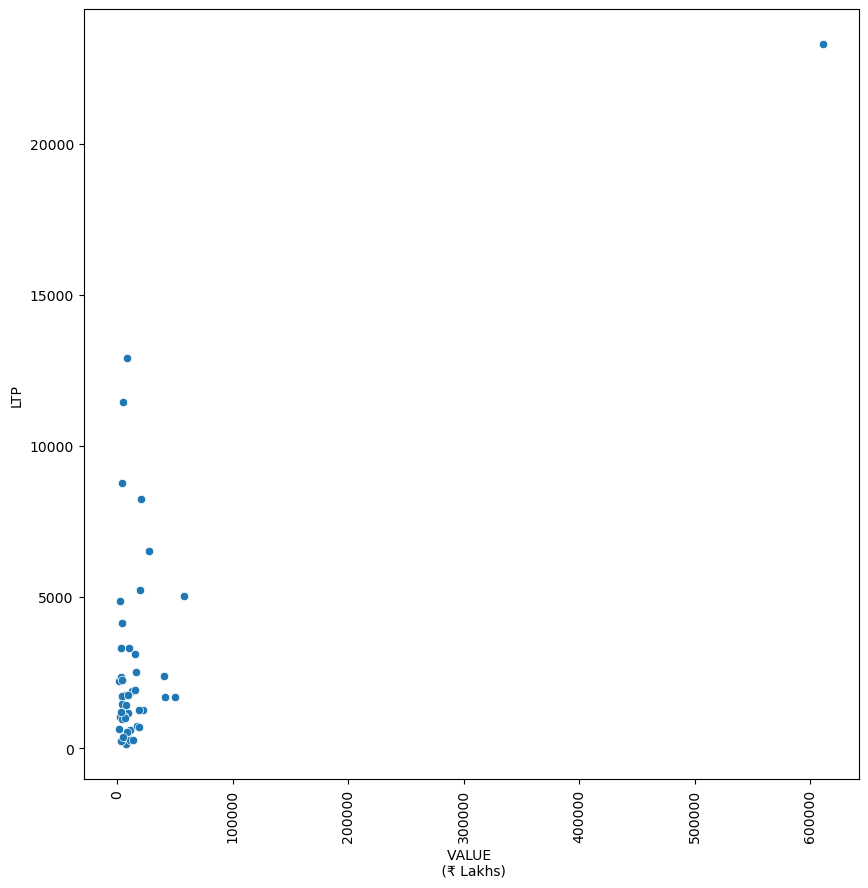

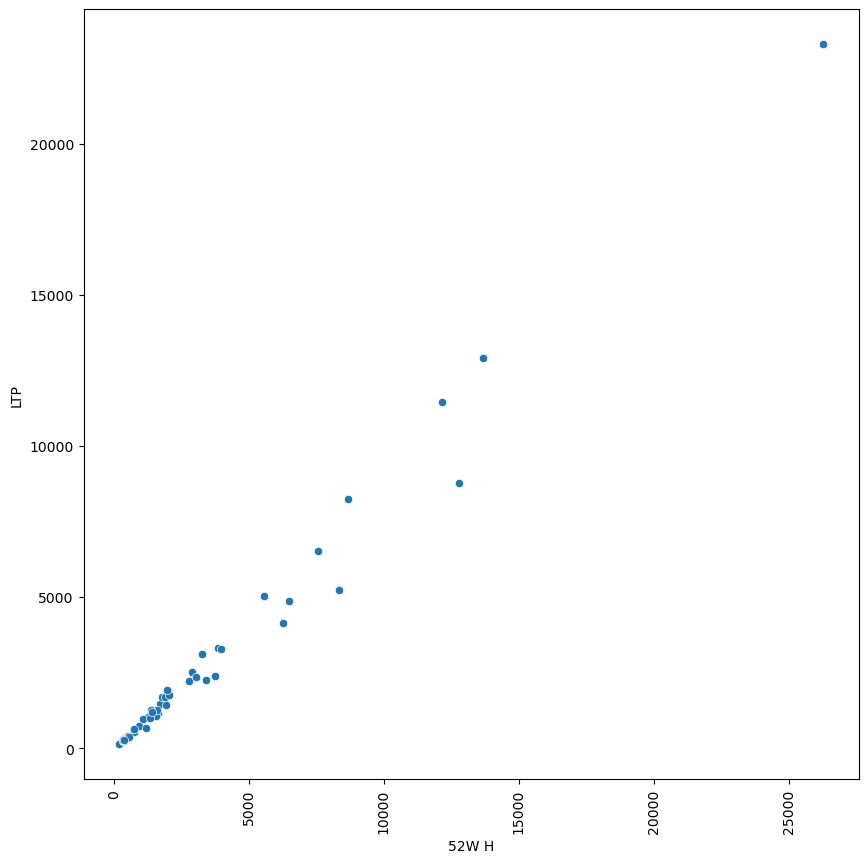

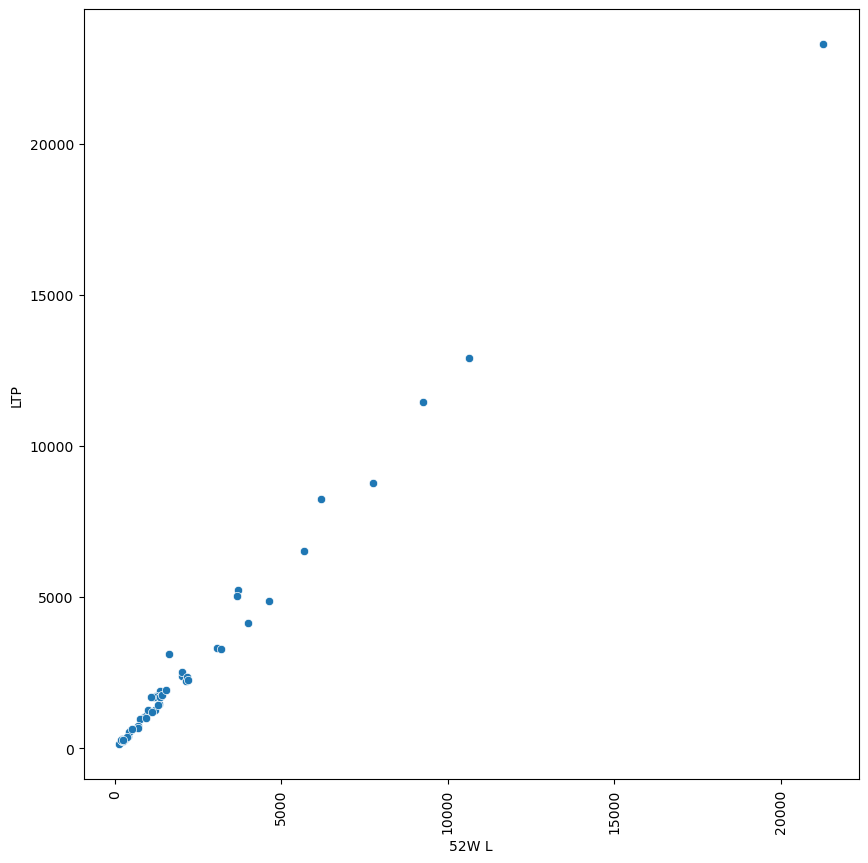

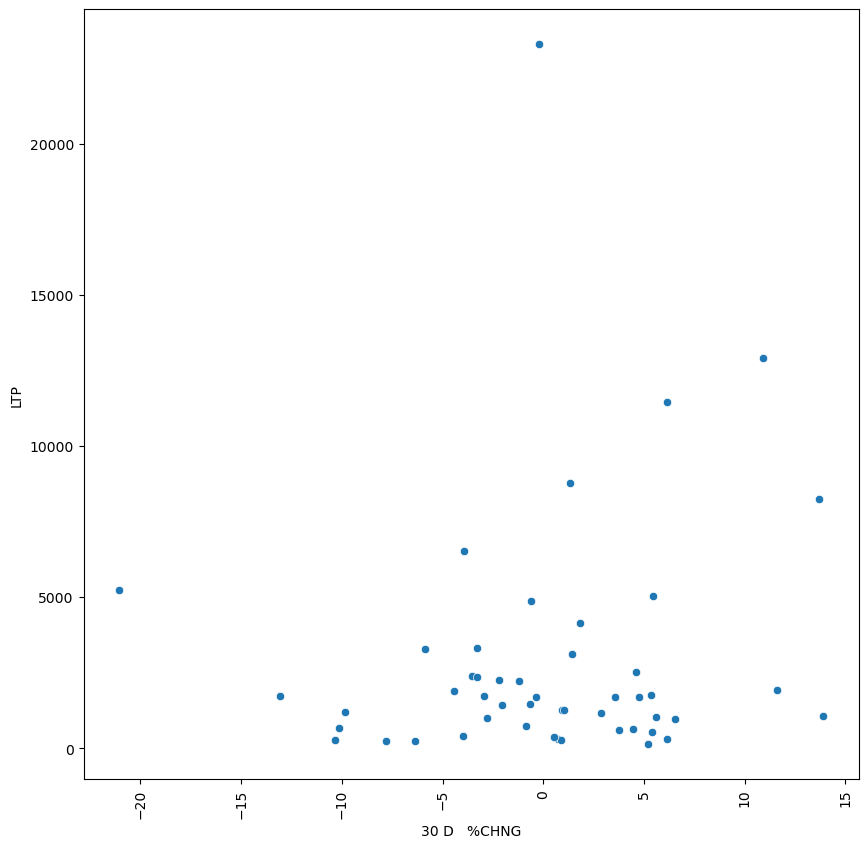

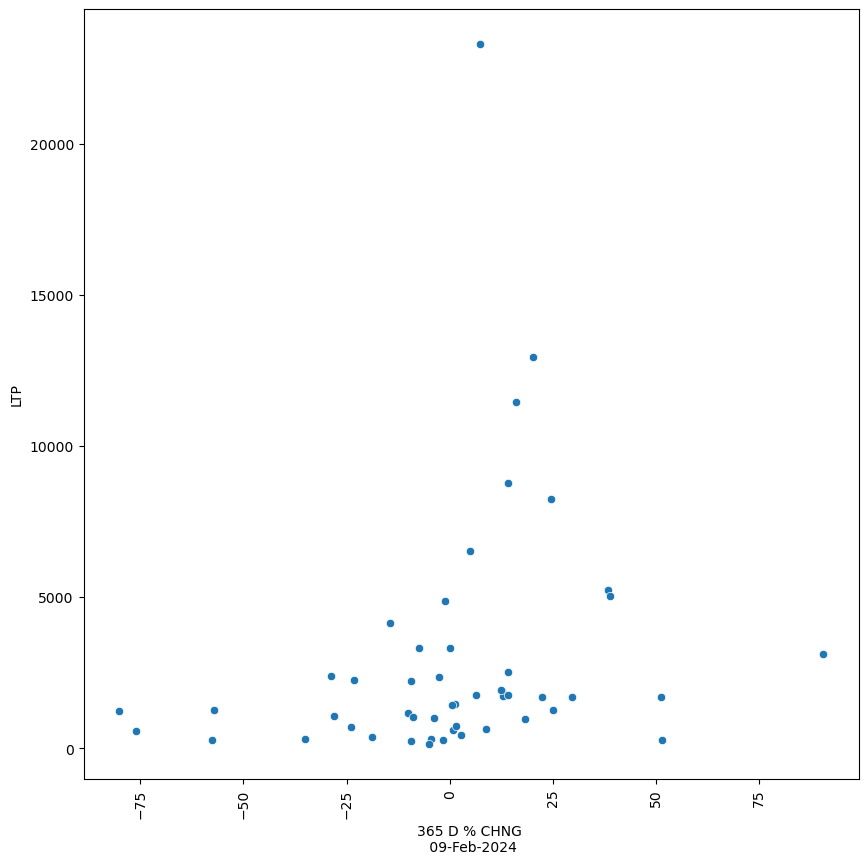

In [36]:
for i in z:
    if(z[i].dtype != "object") and ( i != "LTP"):
        plt.figure(figsize = (10, 10))
        sns.scatterplot(x = z[i], y = z["LTP"], data = z)
        plt.xticks(rotation = 90)

**Multivariate Analysis**

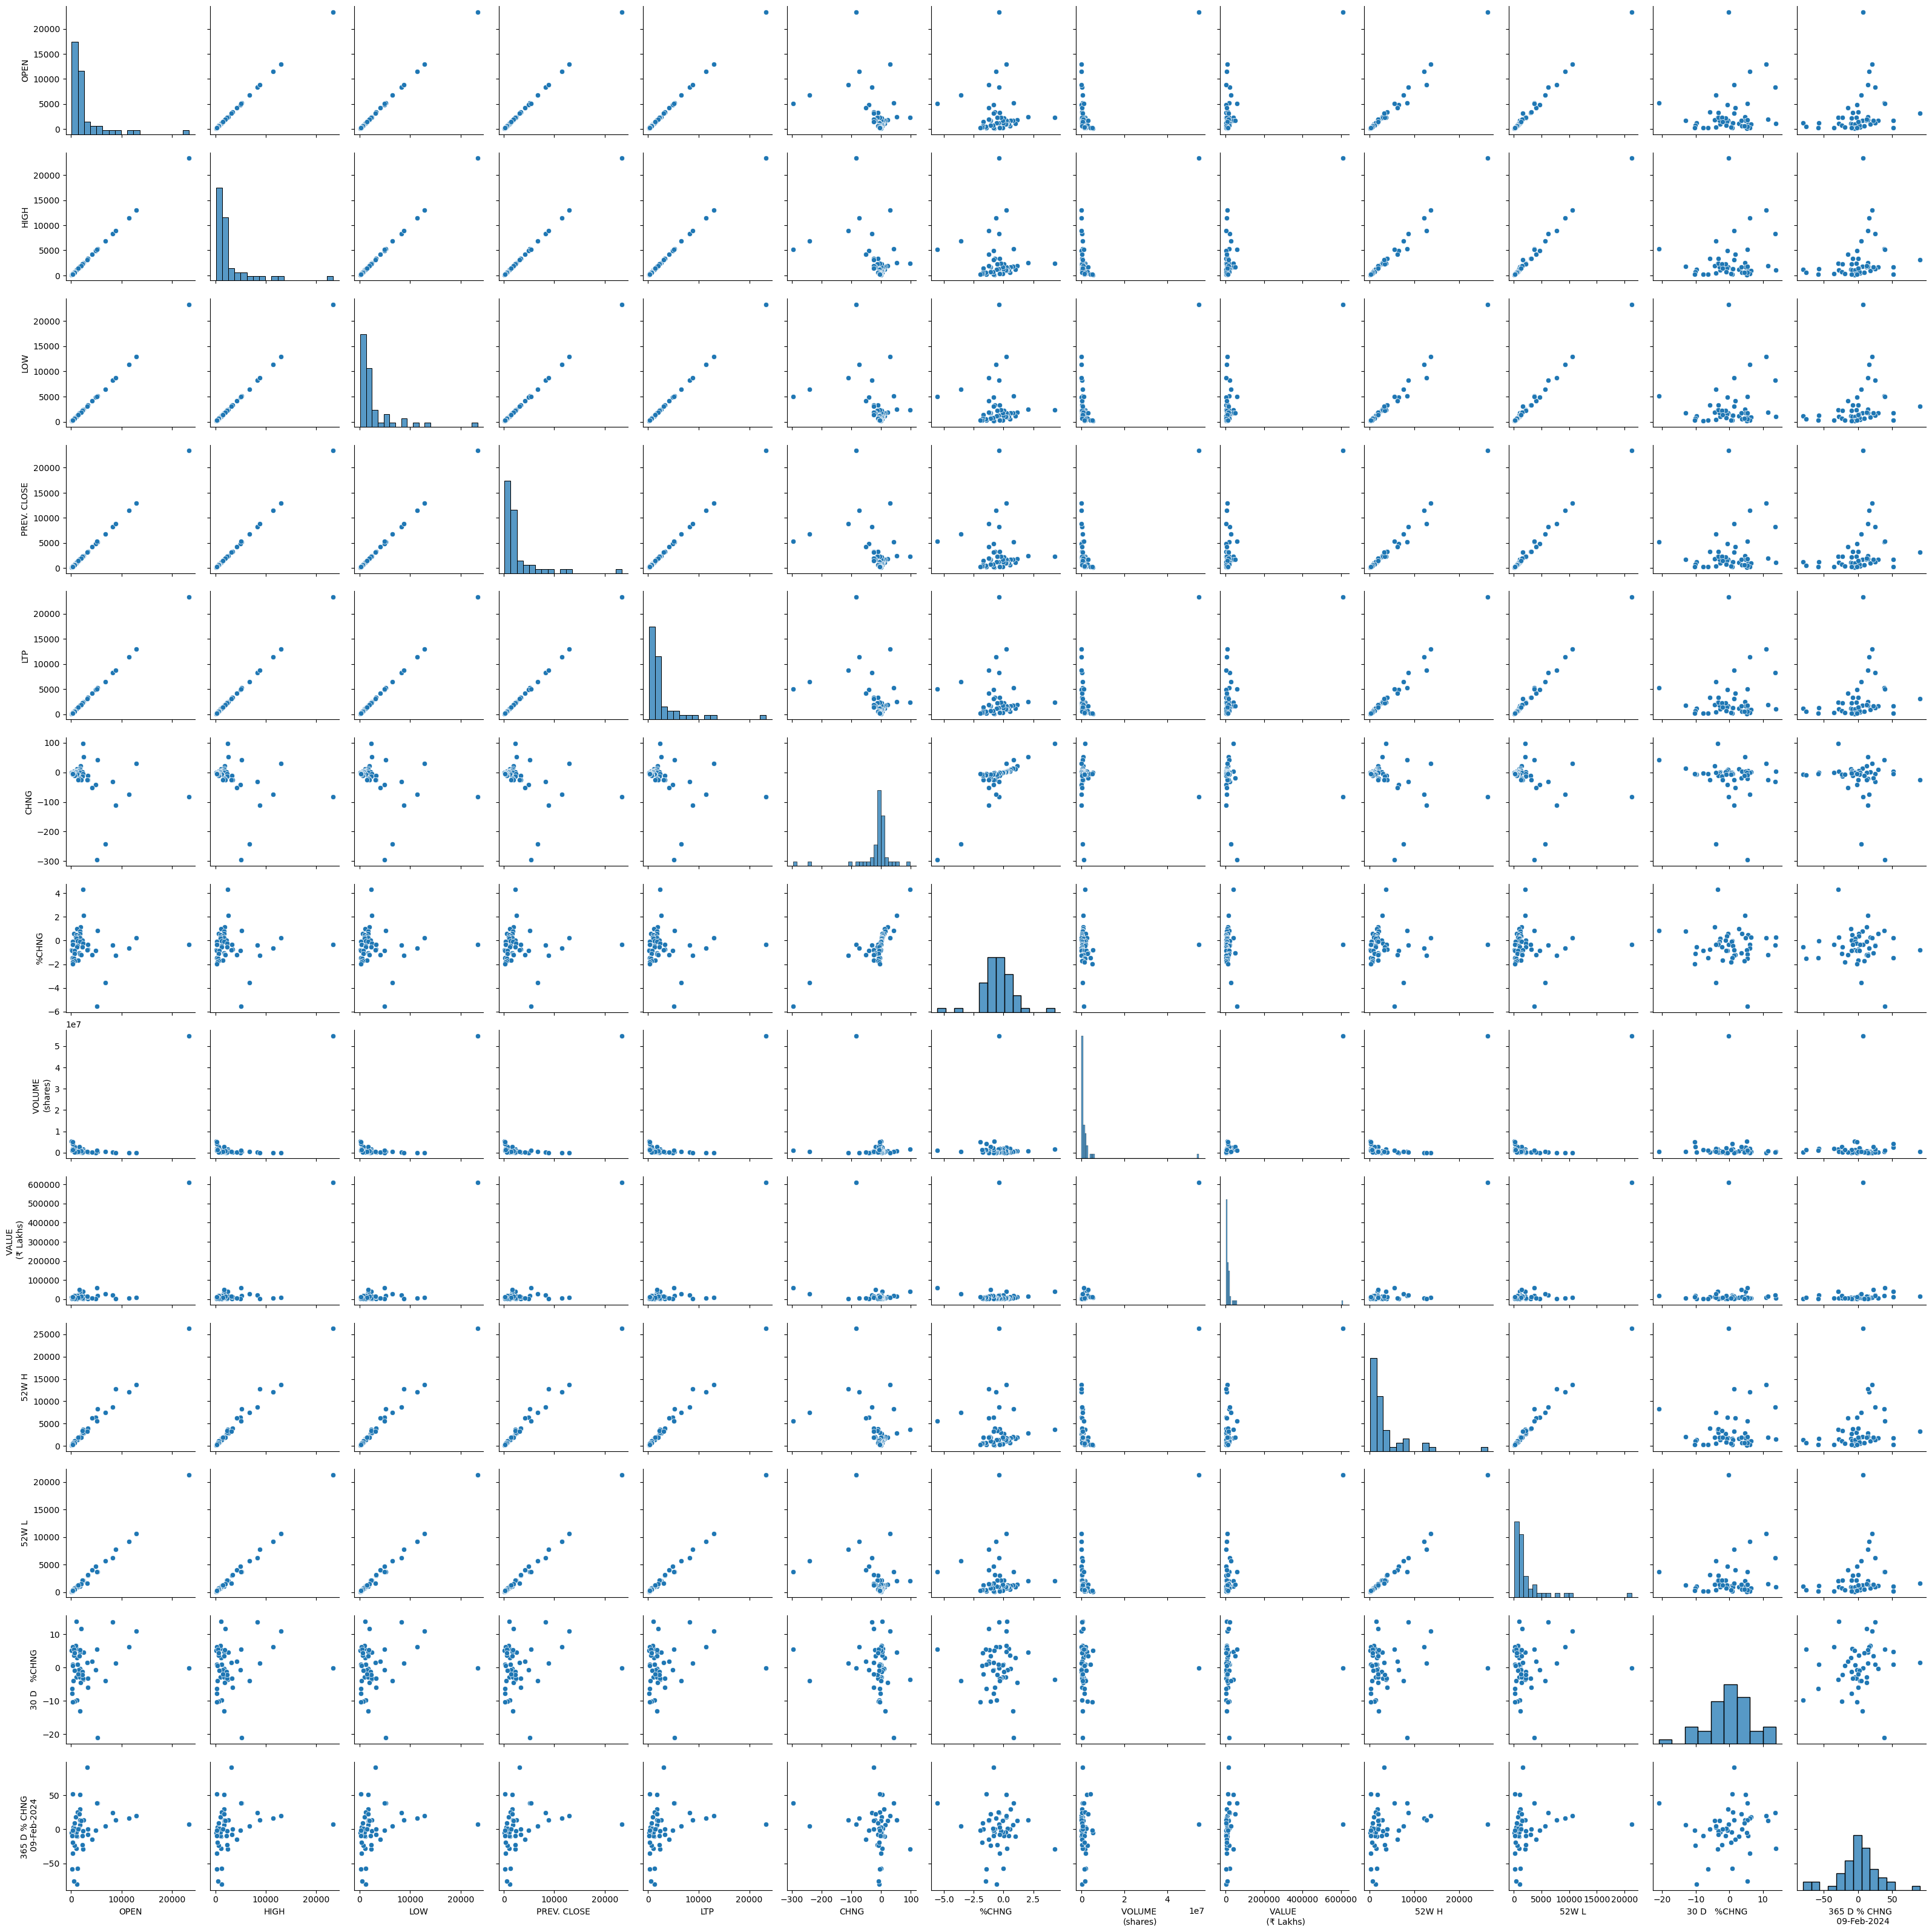

In [38]:
sns.pairplot(z)

**Predictive Modeling**

In [40]:
b = z.copy()
for i in b:
    if(b[i].dtype == "object"):
        b.drop([i], axis = 1, inplace = True)
b

,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE \n (₹ Lakhs),52W H,52W L,30 D %CHNG,365 D % CHNG \n 09-Feb-2024
0,23383.55,23390.05,23285.10,23381.60,23298.15,-83.45,-0.36,54719074.0,611251.32,26277.35,21281.45,-0.21,7.34
1,2312.00,2393.50,2310.05,2290.80,2389.00,98.20,4.29,1719758.0,40670.73,3743.90,2025.00,-3.52,-28.75
2,2460.00,2542.00,2456.05,2473.25,2525.00,51.75,2.09,656522.0,16531.55,2877.75,2027.50,4.62,14.05
3,1883.10,1903.00,1883.10,1880.30,1902.00,21.70,1.15,684002.0,12970.80,2006.45,1358.35,-4.41,12.64
4,1144.20,1160.00,1136.85,1144.20,1155.70,11.50,1.01,816676.0,9385.81,1621.40,995.65,2.88,-10.01
5,5211.55,5249.90,5171.10,5196.75,5240.00,43.25,0.83,379116.0,19781.06,8345.00,3700.10,-21.07,38.23
6,1742.80,1749.00,1733.85,1733.85,1747.90,14.05,0.81,374007.0,6521.07,2012.20,1235.00,-13.09,6.33
7,1706.00,1709.00,1688.60,1699.05,1708.90,9.85,0.58,265299.0,4510.30,1807.70,1162.95,-0.38,29.59
8,594.05,607.00,593.50,596.00,599.35,3.35,0.56,1870022.0,11254.54,772.65,496.35,3.75,0.79
9,1029.90,1035.45,1026.30,1027.50,1032.25,4.75,0.46,262147.0,2706.80,1256.44,882.90,5.62,-9.01


In [41]:
b.corr()

,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME \n(shares),VALUE \n (₹ Lakhs),52W H,52W L,30 D %CHNG,365 D % CHNG \n 09-Feb-2024
OPEN,1.000000,0.999985,0.999928,0.999972,0.999938,-0.367883,-0.061409,0.665760,0.726781,0.990323,0.995108,0.139505,0.229908
HIGH,0.999985,1.000000,0.999926,0.999954,0.999950,-0.365847,-0.058680,0.663611,0.724830,0.990463,0.994963,0.140335,0.230013
LOW,0.999928,0.999926,1.000000,0.999881,0.999986,-0.358591,-0.054244,0.668263,0.728514,0.990329,0.995292,0.140353,0.228751
PREV. CLOSE,0.999972,0.999954,0.999881,1.000000,0.999904,-0.372078,-0.065070,0.664975,0.726355,0.990277,0.994891,0.140989,0.231093
LTP,0.999938,0.999950,0.999986,0.999904,1.000000,-0.359174,-0.053422,0.666564,0.727267,0.990349,0.995044,0.139838,0.229659
CHNG,-0.367883,-0.365847,-0.358591,-0.372078,-0.359174,1.000000,0.803675,-0.136750,-0.204500,-0.357314,-0.353478,-0.128574,-0.180510
%CHNG,-0.061409,-0.058680,-0.054244,-0.065070,-0.053422,0.803675,1.000000,-0.009915,-0.011047,-0.040794,-0.053116,-0.072037,-0.073724
VOLUME \n(shares),0.665760,0.663611,0.668263,0.664975,0.666564,-0.136750,-0.009915,1.000000,0.983537,0.649413,0.705237,-0.017095,0.030860
VALUE \n (₹ Lakhs),0.726781,0.724830,0.728514,0.726355,0.727267,-0.204500,-0.011047,0.983537,1.000000,0.711333,0.759406,0.002717,0.074953
52W H,0.990323,0.990463,0.990329,0.990277,0.990349,-0.357314,-0.040794,0.649413,0.711333,1.000000,0.988881,0.082909,0.213678


**Plotting correlation cofficient using heatmap**

<Axes: >

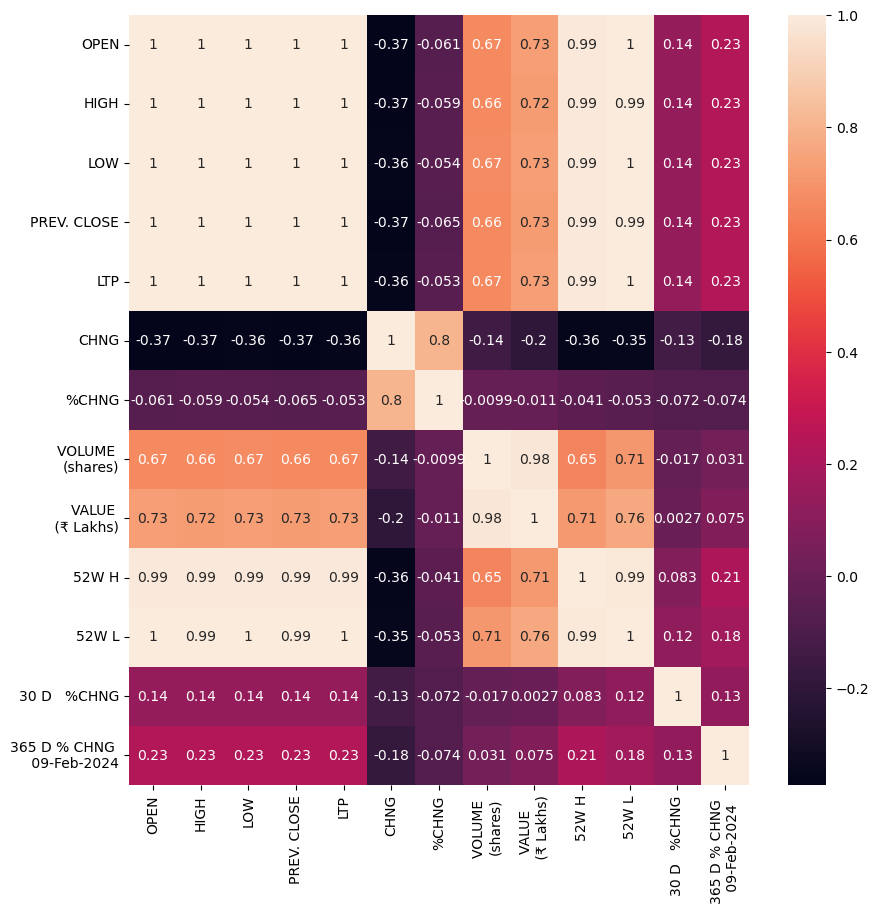

In [43]:
plt.figure(figsize = (10, 10))
sns.heatmap(b.corr(), annot = True)

In [44]:
b.corr()["LTP"].sort_values(ascending = False).head(2)

LTP    1.000000
LOW    0.999986
Name: LTP, dtype: float64

<Axes: xlabel='LOW', ylabel='LTP'>

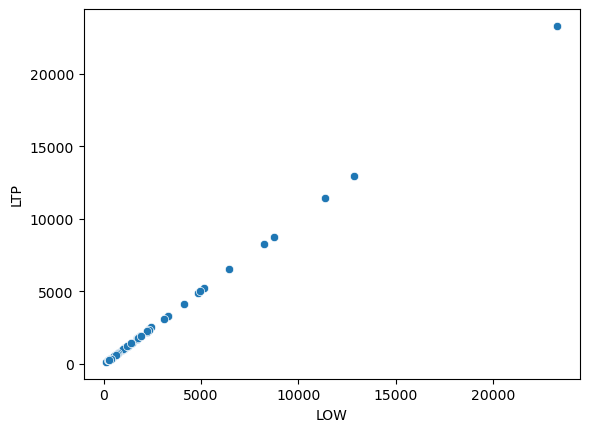

In [45]:
sns.scatterplot(x = b["LOW"], y = b["LTP"], data = b)

**Plotting Regression plot between `LOW` column  and `LTP` column**

<Axes: xlabel='LOW', ylabel='LTP'>

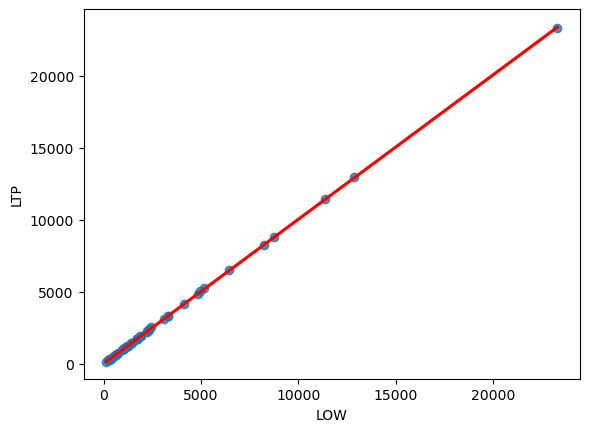

In [47]:
sns.regplot(x = b["LOW"], y = b["LTP"], data = b, line_kws = {"color" :"red"})

**Model Selection**

In [49]:
X = b["LOW"]
Y = b["LTP"]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

**Reshaping x_train**

In [52]:
x_train = np.array(x_train).reshape(-1, 1)

**Reshaping y_train**

In [54]:
y_train = np.array(y_train).reshape(-1, 1)

**Fitting Training data**

In [56]:
n = LinearRegression()
n.fit(x_train, y_train)

LinearRegression()

**Evaluating Training data**

In [58]:
y_predict_train = n.predict(x_train)
r2_train = r2_score(y_true = y_train, y_pred = y_predict_train)

In [59]:
round(r2_train, 2)*100

100.0

**To get Mean square error for training data**

In [61]:
mse_train = mse(y_true = y_train, y_pred = y_predict_train)
mse_train

341.29898751251994

**To get  Root mean square error for Training Data**

In [63]:
rmse_train = np.sqrt(mse_train)
rmse_train

18.474279079642592

**To get Mean absolute error for Training data**

In [65]:
mae_train = mae(y_true = y_train, y_pred = y_predict_train)
mae_train

11.889521719194562

**Reshaping x_test**

In [67]:
x_test = np.array(x_test).reshape(-1, 1)

**Reshaping y_test**

In [69]:
y_test = np.array(y_test).reshape(-1, 1)

**Evaluating Testing  data**

In [71]:
y_predict_test = n.predict(x_test)
r2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

In [72]:
round(r2_test, 2)*100

100.0

**To get Mean square error for Testing data**

In [74]:
mse_test = mse(y_true = y_test, y_pred = y_predict_test)
mse_test

754.3820810653335

**To get Root mean square error for Testing Data**

In [76]:
rmse_test = np.sqrt(mse_test)
rmse_test

27.466016840185137

**To get Mean absolute error for Testing data**

In [78]:
mae_test = mae(y_true = y_test, y_pred = y_predict_test)
mae_test

18.73732640467366

**Residual analysis for Training data**

In [80]:
res_train = y_train - y_predict_train

In [81]:
res_train

array([[ -5.18548299],
       [ -7.29560893],
       [-10.72400241],
       [ -7.58111809],
       [  8.14872517],
       [ -6.80801854],
       [  2.01973829],
       [-17.06116029],
       [  5.32482289],
       [  4.56316758],
       [ 15.49368385],
       [ 64.92798887],
       [  8.35964521],
       [  3.02648027],
       [ -1.74595667],
       [-33.46824654],
       [ -8.19929566],
       [-11.24676633],
       [ -4.20756873],
       [ -5.13001432],
       [ -7.74406919],
       [ 33.48549208],
       [ -5.95663797],
       [ -7.46150977],
       [ -7.03664558],
       [ 54.48848851],
       [ -7.21080737],
       [ -7.09734486],
       [  2.06517097],
       [ -5.45549095],
       [ -7.07237964],
       [ -2.96621549],
       [  6.1632264 ],
       [-28.40756871],
       [ -3.00472108]])

<Axes: ylabel='Density'>

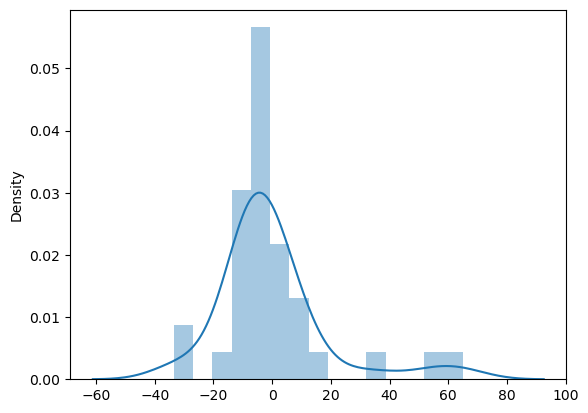

In [82]:
sns.distplot(res_train, kde = True)

**Residual analysis for Testing  data**

In [84]:
res_test = y_test - y_predict_test

In [85]:
res_test

array([[  1.76251016],
       [ -6.88347268],
       [ -9.24044129],
       [ 26.39181886],
       [ -7.37678433],
       [ 59.55767989],
       [ 46.26543741],
       [ -6.78878218],
       [-14.16033334],
       [ -6.97653174],
       [-64.11271037],
       [ -2.86955101],
       [ -5.14348098],
       [ -8.29668502],
       [-15.23367681]])

<Axes: ylabel='Density'>

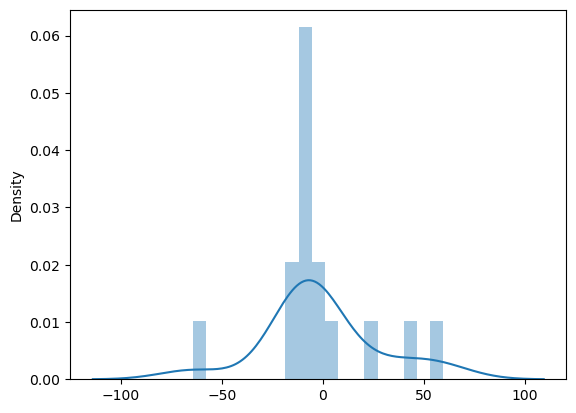

In [86]:
sns.distplot(res_test, kde = True)

**Recommendations**

**For Stocks with Rising Predicted Prices (Bullish Signals)**

The model predicts a strong price increase with high confidence (high R² and low error rates).
                                                                 
Trading volume is high, indicating strong investor interest.
                                                                 
Market sentiment and news (e.g., earnings reports, economic data) support bullish momentum.
                                                                 
The stock is trading above key moving averages (e.g., 50-day and 200-day MA).
                                                                 
**Stop-Loss & Target Strategy**

Stop-Loss: Set at 2-5% below the current price to limit potential losses.
Profit Target: Aim for a 5-10% increase, depending on volatility and historical trends.
Additional Strategies:

**Use Technical Indicators**

RSI above 70 may indicate overbought conditions (wait for a dip).
MACD crossover above the signal line confirms a bullish trend.
Sector Strength Matters:

If the overall sector is bullish (e.g., tech or energy rallies), stock gains are more sustainable.
                                                 
Avoid stocks in weak industries, even if the model predicts an increase.
                                                 
**When to Take Profits**

If the price reaches a strong resistance level, consider partial profit booking.

Use a trailing stop-loss to protect gains while allowing further upside.

2. For Stocks with Falling Predicted Prices (Bearish Signals)

**Avoid Buying or Consider Short-Selling**

The stock is predicted to decline in value, supported by low R² and consistent downward movement.
                                                 
Fundamental analysis shows negative earnings, declining revenue, or weak guidance.
                                                 
The stock is trading below major moving averages (50-day, 200-day EMA).
                                                 
High selling volume confirms that institutional investors are exiting.
                                                 
**Risk Management Strategies**

Hedging with options: Buy put options to profit from a drop while limiting downside risk.
                                                 
Short Selling Caution: Ensure high liquidity to avoid getting stuck in a short squeeze.
                                                 
Place a stop-buy order to exit in case of a sudden reversal.
                                                 
Look for reversal signals before buying again.
                                                 
RSI near 30 may signal an oversold condition (potential bounce).
                                                 
Look for a double bottom or trend reversal pattern before entering long positions.
                                                 
**Sector and Market Trends Matter**

If the entire sector or index is in a downtrend, it’s safer to stay out.
                                               
Check global economic conditions, including inflation, interest rates, and geopolitical events.
When to Cut Losses:

If a stock drops 7-10% below your entry, it's best to exit rather than average down.
                                                 
3. For Uncertain or Sideways Trends (Range-Bound Market)
                                     
**Wait for Breakout Confirmation Before Trading**

If the model shows low confidence in price movement, avoid taking large positions.
Identify key support and resistance levels where the stock keeps bouncing.
Volume confirmation is essential—breakouts with high volume indicate a stronger trend.
Best Strategies for Sideways Markets:

**Swing Trading Approach**

Buy near support zones and sell near resistance.
                                                 
Use Bollinger Bands to trade between upper and lower bands.
                                                 
**Moving Averages for Confirmation**

A 50-day MA crossing above the 200-day MA signals a bullish breakout (Golden Cross).
                 
A 50-day MA crossing below the 200-day MA signals a bearish breakdown (Death Cross).
                 
**Options Strategies for Low Volatility Markets**

Use straddles or strangles to profit from future volatility spikes.
                                    
Sell iron condors if expecting minimal price movement.